In [1]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Dimension reduction and clustering libraries
import umap
#import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

from sklearn.datasets import fetch_openml
from sklearn.cluster import HDBSCAN

In [2]:
mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(int)

c:\Users\lorenzo\anaconda3\envs\esm\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


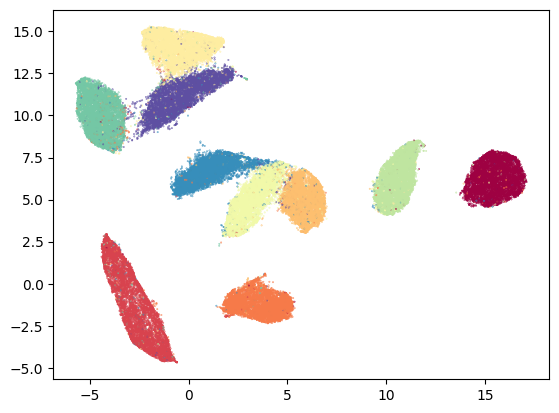

In [6]:
standard_embedding = umap.UMAP().fit_transform(mnist.data)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=mnist.target.astype(int), s=0.1, cmap='Spectral');

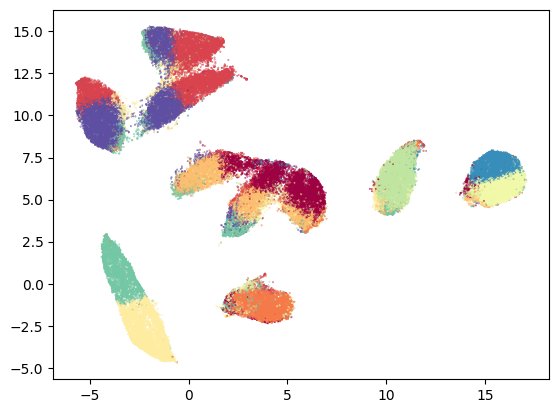

In [7]:
kmeans_labels = cluster.KMeans(n_clusters=10).fit_predict(mnist.data)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=kmeans_labels, s=0.1, cmap='Spectral');

In [8]:
(
    adjusted_rand_score(mnist.target, kmeans_labels),
    adjusted_mutual_info_score(mnist.target, kmeans_labels)
)

(0.3609258927225578, 0.491261274557648)

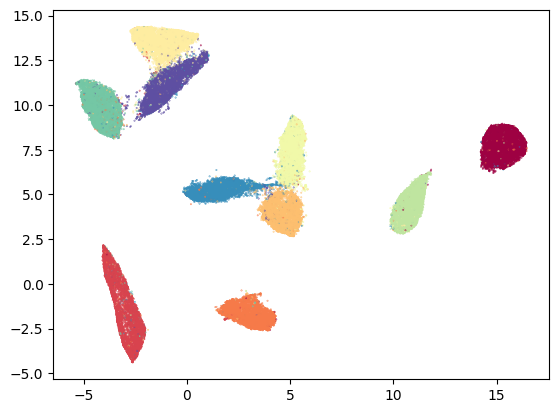

In [ ]:
lowd_mnist = PCA(n_components=50).fit_transform(mnist.data)


clusterable_embedding = umap.UMAP(
    n_neighbors=30,
    min_dist=0.0,
    n_components=2,
).fit_transform(mnist.data)

plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c=mnist.target, s=0.1, cmap='Spectral');

In [11]:
labels = HDBSCAN(
    min_samples=10,
    min_cluster_size=500,
    n_jobs=-1
).fit_predict(lowd_mnist)

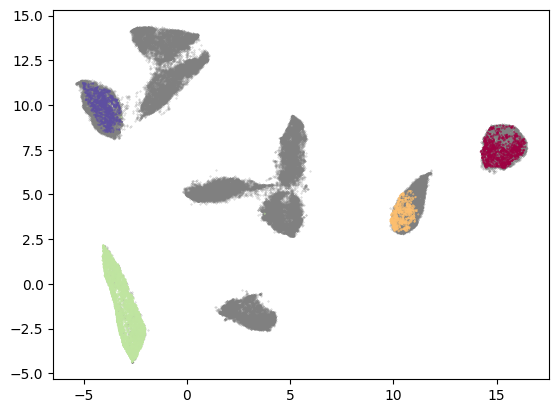

In [12]:
clustered = (labels >= 0)
plt.scatter(clusterable_embedding[~clustered, 0],
            clusterable_embedding[~clustered, 1],
            color=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5)
plt.scatter(clusterable_embedding[clustered, 0],
            clusterable_embedding[clustered, 1],
            c=labels[clustered],
            s=0.1,
            cmap='Spectral');

In [10]:
adjusted_rand_score(mnist.target, labels), adjusted_mutual_info_score(mnist.target, labels)

(0.8392149900687471, 0.8866560329990916)